# Calmifornia Housing Regression

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use('ggplot')

# Getting the Data

In [2]:
from sklearn import datasets
data = datasets.fetch_california_housing()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'target']

In [4]:
data_df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [5]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
data_df.loc[:, 'target'] = data.target

In [7]:
data_df.shape

(20640, 9)

In [8]:
data_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Inspect the target Column

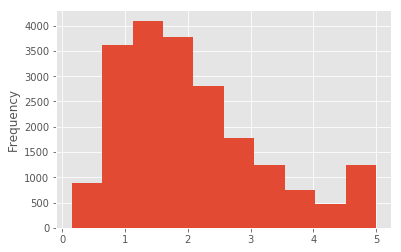

In [9]:
data_df.target.plot(kind='hist')

# Baseline Model with Linear Regression

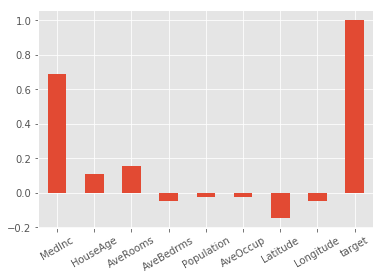

In [10]:
data_df.corrwith(data_df.target).plot(kind='bar', rot=30)

In [11]:
from sklearn.model_selection import cross_validate, KFold
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('reg', LinearRegression())
])

fold = KFold(n_splits=10, random_state=12345)
X = data_df.loc[:, ['MedInc', 'AveBedrms', 'Latitude']].values
y = data_df.target.values

results = cross_validate(
    model, X, y, cv=fold, scoring='r2', return_train_score=True
)

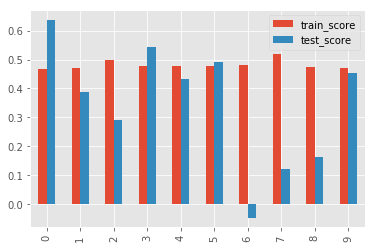

In [12]:
results = pd.DataFrame.from_dict(results)
results.loc[:, ['train_score', 'test_score']].plot(kind='bar')

# The MLP Regression Model

In [37]:
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import RMSprop

def build_model():
    model = Sequential()
    
    #add model layers
    model.add(BatchNormalization())
    model.add(Dense(256, activation='relu')),
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu')),
    model.add(Dropout(0.2))
    model.add(Dense(1))
    
    model.compile(
        optimizer=RMSprop(lr=1.5 * 1E-3),
        loss='mean_squared_error', 
        metrics=['mean_squared_error'])
    
    return model

model = Pipeline([
    ('reg', KerasRegressor(build_fn=build_model, epochs=50, batch_size=128, verbose=False))
])

fold = KFold(n_splits=10, random_state=12345)
X = data_df.drop('target', axis=1).values.astype(np.float32)
y = data_df.target.values.astype(np.float32)

results = cross_validate(
    model, X, y, cv=fold, scoring='r2', return_train_score=True
)

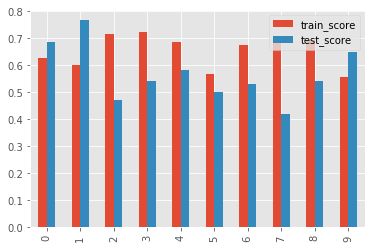

In [38]:
results = pd.DataFrame.from_dict(results)
results.loc[:, ['train_score', 'test_score']].plot(kind='bar')

In [39]:
results.mean()

fit_time       92.480895
score_time      3.280715
test_score      0.567996
train_score     0.652554
dtype: float64